<a href="https://colab.research.google.com/github/mithunkumarsr/CodeMixingDravidianLanguage/blob/main/TamilCMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import re
import nltk
import string
from nltk.corpus import stopwords
import spacy

from sklearn.metrics import accuracy_score,classification_report, f1_score
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [3]:
# DATA CLEANING AND PREPARATION #
class Utils(object):

    def cleanText(self, text):
        review = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", str(text))
        review = re.sub(r"\([\s\S]*\)", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", str(review))
        review = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", str(review))
        review = review.lower()
        review = re.sub(r"that's", "that is", str(review))
        review = re.sub(r"there's", "there is", str(review))
        review = re.sub(r"what's", "what is", str(review))
        review = re.sub(r"where's", "where is", str(review))
        review = re.sub(r"it's", "it is", str(review))
        review = re.sub(r"who's", "who is", str(review))
        review = re.sub(r"i'm", "i am", str(review))
        review = re.sub(r"she's", "she is", str(review))
        review = re.sub(r"he's", "he is", str(review))
        review = re.sub(r"they're", "they are", str(review))
        review = re.sub(r"who're", "who are", str(review))
        review = re.sub(r"ain't", "am not", str(review))
        review = re.sub(r"wouldn't", "would not", str(review))
        review = re.sub(r"shouldn't", "should not", str(review))
        review = re.sub(r"can't", "can not", str(review))
        review = re.sub(r"couldn't", "could not", str(review))
        review = re.sub(r"won't", "will not", str(review))
        review = re.sub(r" pm ", " ", str(review))
        review = re.sub(r" am ", " ", str(review))
        review = re.sub(r'[^\[\]]+(?=\])', " ", str(review))
        review = re.sub(r"\W", " ", str(review))
        review = re.sub(r"\d", " ", str(review))
        review = re.sub(r"\s+[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+[a-z]$", " ", str(review))
        review = re.sub(r"^[a-z]\s+", " ", str(review))
        review = re.sub(r"\s+", " ", str(review))
        return review

    def remove_punc(self, text):
        table = str.maketrans("", "", string.punctuation)
        return text.translate(table)

    def remove_emoticon(self, text):
        emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)


    
    def lemmatization(self, text):
        doc = nlp(text)
        return " ".join([token.lemma_ for token in doc])

    nltk.download('stopwords')
    def remove_stops(self, text):
        stop_words = set(nltk.corpus.stopwords.words('english'))
        text = [word.lower() for word in text.split() if word.lower() not in stop_words]
        return " ".join(text)


    def readData1(self, path, inputColumnIndex=0, outputColumnIndex=1):
        df = pd.read_csv(path, error_bad_lines=False, sep='\t')
        X = df.iloc[:, inputColumnIndex].values
        y = df.iloc[:, outputColumnIndex].values
        return X,y
    
    def readData2(self, path, inputColumnIndex=1, outputColumnIndex=2):
        df = pd.read_csv(path, error_bad_lines=False, sep='\t')
        X = df.iloc[:, inputColumnIndex].values
        y = df.iloc[:, outputColumnIndex].values
        return X,y
    
    def draw_prediction_results(self, y_pred, y_test, my_tags, method):
        print('accuracy of ' + method + ': %s' % accuracy_score(y_pred, y_test))
        print(classification_report(y_test, y_pred, target_names=my_tags, digits = 6))

    
    def crossValidation(self, prediction, input, output, k=5):
        scores = cross_val_score(prediction, input,output, cv=k)
        print("Accuracy of Cross Validation Mean: %0.6f (+/- %0.6f)" % (scores.mean(), scores.std() * 2))

[nltk_data] Downloading package stopwords to /Users/aapoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# clean data
# from cleantext import clean # helps to remove imoji in text
import pandas as pd
import re

# 
def clean( text ):
  '''clean tweet texts and remove links, usernamas'''
  text = text.lower()
  text = ' '.join( text.split() )
  text = ' '.join( [ re.sub("^@\w+", " ", t) for t in text.split(' ') ] ) # remove usernames
  # text = ' '.join( [ re.sub("^@\w+", " ", t) for t in text.split(' ') ] ) # remove hashtags
  text = ' '.join( [ re.sub("^http\w+", " ", t) for t in text.split(' ') ] ) # remove links
  print(text)
  text = re.sub("[^a-z0-9]", " ", text) # remove imoji.
  # text = clean(text, no_emoji=True)
  return ' '.join( text.split() )

# make classes
def make_label( class_ ):
  ''' 
  neu   - 0
  pos   - 1
  neg   - 2
  vpos  - 3
  vneg  - 4
  '''
  class_ = class_.lower()
  if class_ == 'vneg': return 4
  elif class_ == 'neu': return 0
  elif class_ == 'neg': return 2
  elif class_ == 'vpos': return 3
  elif class_ == 'pos': return 1
  
  
# load data
data = pd.read_csv("./traindata1.1.csv",engine="python", encoding='utf-8')
data.drop(axis=1, inplace=True, columns=['UserID','Date/Time'] )
data.drop_duplicates(inplace=True)
data['shona_cleaned'] = data['SN(Original Shona Tweet)'].apply( clean ) # clean shona tweets.
data['Label5'] = data['finalLabel5Classes'].apply( make_label )
df = data[[ 'shona_cleaned', 'Label5']]
df.head()

<AxesSubplot: xlabel='count', ylabel='Label5'>

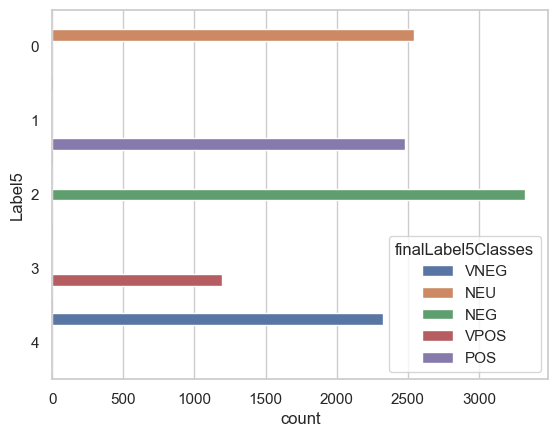

In [36]:
# data visualisation
import seaborn as sns
# sns.set_theme(style="whitegrid")

# print(data.columns)
sns.countplot(data=data, y='Label5', hue="finalLabel5Classes")

In [5]:
# FUNCTION CALL FOR DATA CLEANING AND PREPARATION #
utils = Utils()
x_train, x_test, y_train, y_test = train_test_split(df['shona_cleaned'], df['Label5'], test_size=0.3, random_state=42)

ourTags =['neutral', 'positive', 'negative', 'very-positive', 'very-negative']
X_train=[]

for i in range(0, len(x_train.values)):
    t = utils.cleanText(x_train.values[i])
    t = utils.remove_emoticon(t)
    t = utils.remove_punc(t)
    t = utils.remove_stops(t)
    t = utils.lemmatization(t)
    X_train.append(t)

print(X_train[ : 10] )

['nhasi mukoma abva amuka hake achiudza vanhu chokwadi', 'hahahaha vaudze vana ava vanomhanya kuitisa nharo pasina kana ruzivo', 'haasi kuforca vanhu hake arikungoti anoda kuterera ngaaterere asingade oita zvelife yake asi asazodzoke kwatiri akuchema achida kucomfortwa isu toseka chete', 'uyu wemasupa uyu', 'zvinoshamisa ndezvokuti zvimwe zvakasara zvakazvikara asi akazoita zvokukushanyirwa simba nazvo akabhira basa rekuita kuti agone kugona kuronga vanhu vakazoronga vakazomurwira co jon ijis', 'ko kna ndine nzara', 'let talk kugadzira mbudzi round bhoo mota dzinobva nekuna highglen road goin kuna beatrice road makazoti vanoenda nekupi zviya can not havin truck usin ghetto single lane vana havachato famba muroad chimhanda zvakurirwa plizz help', 'dai watotengera mwana wako hanzi ndinoda vana vangu', 'huya pano wine glass sorry asi ndiwe wandafunga pandaona tweet tikasakubata uchitaura naro muguva girazi rewine zve winethursday', 'roorai vakadzidza vakadzidza face nemagaro hazviitise mw

In [6]:
# FUNCTION CALL FOR DATA CLEANING AND PREPARATION #
X_test=[]

for i in range(0, len(x_test.values)):
    t = utils.cleanText(x_test.values[i])
    t = utils.remove_emoticon(t)
    t = utils.remove_punc(t)
    t = utils.remove_stops(t)
    t = utils.lemmatization(t)
    X_test.append(t)
# 
print(X_test[: 10])

['chitowamombe cde gwasai lecture yaisapera pasina kutaurwa nezve song ya winky', 'atova nekutonga misa mutongo misa misa ita mutongo na hrs wozoikanda nyaya yako mumabhini nemudhudhusi imboko vanhu vezanu', 'akuhumana uyu', 'kusvika wati eke chinhu chawo wawe kuchida', 'usamhanye mwana weafrica co bfbkflmab', 'aaaaaa mdhara nababa vako ko hausikumbofunga mai vako', 'danai mai vevana ndakuvara kuno co khcmxr', 'sit talk like old nekupihwa note na mdara cz unenge waniwa zvirinani na baba vako random ama mf', 'unodei ita kuti usazvinetse nezvachamisa', 'chembera mushe iwe chisekuru potera zvakanaka makapera panonaka kudhara mbavha iwe']


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# LOGISTIC REGRESSION #
lrp = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2,analyzer='word', ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('lr', LogisticRegression(max_iter=1000))
                ])
lrp.fit(X_train, y_train)
y_pred = lrp.predict(X_test)

# prediction results
utils.draw_prediction_results(y_pred,y_test,ourTags,"Logistic Regression")


accuracy of Logistic Regression: 0.46248946333239677
               precision    recall  f1-score   support

      neutral   0.515373  0.451282  0.481203       780
     positive   0.433451  0.521246  0.473312       706
     negative   0.450000  0.628743  0.524563      1002
very-positive   0.673913  0.169399  0.270742       366
very-negative   0.437383  0.331915  0.377419       705

     accuracy                       0.462489      3559
    macro avg   0.502024  0.420517  0.425448      3559
 weighted avg   0.481572  0.462489  0.449643      3559



In [9]:
# MULTINOMIAL NAIVE BAYES #
multinomial_naive_bayes = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('multinomial_naive_bayes',
                         MultinomialNB())
                        ])
multinomial_naive_bayes.fit(X_train, y_train)
pred_multinomial_naive_bayes = multinomial_naive_bayes.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_multinomial_naive_bayes,y_test,ourTags,"Multinomial Naive Bayes")

accuracy of Multinomial Naive Bayes: 0.43692048328182076
               precision    recall  f1-score   support

      neutral   0.602410  0.320513  0.418410       780
     positive   0.464088  0.475921  0.469930       706
     negative   0.382789  0.772455  0.511905      1002
very-positive   0.878788  0.079235  0.145363       366
very-negative   0.454795  0.235461  0.310280       705

     accuracy                       0.436920      3559
    macro avg   0.556574  0.376717  0.371178      3559
 weighted avg   0.512320  0.436920  0.405454      3559



In [10]:
# LINEAR SVM #
linear_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('linear_svc',
                        SVC(kernel='linear'))
                        ])
linear_svm.fit(X_train, y_train)
y_pred_svc = linear_svm.predict(X_test)

# prediction results

utils.draw_prediction_results(y_pred_svc,y_test,ourTags,"Linear SVM")

accuracy of Linear SVM: 0.4661421747681933
               precision    recall  f1-score   support

      neutral   0.490119  0.476923  0.483431       780
     positive   0.431235  0.524079  0.473146       706
     negative   0.473684  0.592814  0.526596      1002
very-positive   0.644628  0.213115  0.320329       366
very-negative   0.432099  0.347518  0.385220       705

     accuracy                       0.466142      3559
    macro avg   0.494353  0.430890  0.437744      3559
 weighted avg   0.478207  0.466142  0.457316      3559



In [11]:
# RBF SVM #
rbf_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('rbf_svc',
                        SVC(kernel='rbf', gamma=1))
                        ])
rbf_svm.fit(X_train, y_train)
y_pred_svc = rbf_svm.predict(X_test)

# prediction results
utils.draw_prediction_results(y_pred_svc,y_test,ourTags,"RBF SVM")

accuracy of RBF SVM: 0.531610002809778
               precision    recall  f1-score   support

      neutral   0.656146  0.506410  0.571635       780
     positive   0.491061  0.583569  0.533333       706
     negative   0.477483  0.719561  0.574045      1002
very-positive   0.853448  0.270492  0.410788       366
very-negative   0.538618  0.375887  0.442774       705

     accuracy                       0.531610      3559
    macro avg   0.603351  0.491184  0.506515      3559
 weighted avg   0.570106  0.531610  0.522648      3559



In [12]:
# POLY SVM #
poly_svm = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('poly_svc',
                        SVC(kernel='poly',degree = 1))
                        ])
poly_svm.fit(X_train, y_train)
y_pred_svc = poly_svm.predict(X_test)

# prediction results
utils.draw_prediction_results(y_pred_svc,y_test,ourTags,"POLY SVM")

accuracy of POLY SVM: 0.4664231525709469
               precision    recall  f1-score   support

      neutral   0.488830  0.476923  0.482803       780
     positive   0.433763  0.524079  0.474663       706
     negative   0.472510  0.591816  0.525476      1002
very-positive   0.644628  0.213115  0.320329       366
very-negative   0.434095  0.350355  0.387755       705

     accuracy                       0.466423      3559
    macro avg   0.494765  0.431258  0.438205      3559
 weighted avg   0.478491  0.466423  0.457666      3559



In [13]:
# RANDOM FOREST #
random_forest = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('random_forest',
                         RandomForestClassifier())
                        ])
random_forest.fit(X_train, y_train)
pred_random_forest = random_forest.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_random_forest,y_test,ourTags,"Random Forest")

accuracy of Random Forest: 0.5375105366676033
               precision    recall  f1-score   support

      neutral   0.640502  0.523077  0.575865       780
     positive   0.508855  0.610482  0.555055       706
     negative   0.489240  0.680639  0.569282      1002
very-positive   0.711111  0.349727  0.468864       366
very-negative   0.526946  0.374468  0.437811       705

     accuracy                       0.537511      3559
    macro avg   0.575331  0.507678  0.521375      3559
 weighted avg   0.556568  0.537511  0.531533      3559



In [14]:
# KNeighborsClassifier #
knn = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('kNN', KNeighborsClassifier(n_neighbors=3))
                        ])
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_knn,y_test,ourTags,"KNeighborsClassifier")

accuracy of KNeighborsClassifier: 0.41753301489182354
               precision    recall  f1-score   support

      neutral   0.583333  0.511538  0.545082       780
     positive   0.281159  0.824363  0.419308       706
     negative   0.657944  0.351297  0.458035      1002
very-positive   0.580000  0.079235  0.139423       366
very-negative   0.563636  0.175887  0.268108       705

     accuracy                       0.417533      3559
    macro avg   0.533215  0.388464  0.365991      3559
 weighted avg   0.540152  0.417533  0.399042      3559



In [15]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

In [16]:
# EXTRA TREE CLASSIFIER #
extra_tree = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('extra tree',
                         ExtraTreesClassifier())
                        ])
extra_tree.fit(X_train, y_train)
pred_extra_tree = extra_tree.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_extra_tree,y_test,ourTags,"Extra Tree Classifier")

accuracy of Extra Tree Classifier: 0.541725203708907
               precision    recall  f1-score   support

      neutral   0.641902  0.553846  0.594632       780
     positive   0.482163  0.593484  0.532063       706
     negative   0.522709  0.654691  0.581303      1002
very-positive   0.648780  0.363388  0.465849       366
very-negative   0.517056  0.408511  0.456418       705

     accuracy                       0.541725      3559
    macro avg   0.562522  0.514784  0.526053      3559
 weighted avg   0.552634  0.541725  0.537845      3559



In [17]:
# VOTING CLASSIFIER #
# ALL CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Multinomial Naive Bayes", multinomial_naive_bayes), ("Extra Tree", extra_tree), ("Random Forest", random_forest), ("Poly SVM", poly_svm), ("RBF SVM", rbf_svm), ("KNeighborsClassifier", knn)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
pred_hard_ensemble = hard_ensemble.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_hard_ensemble,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.5071649339702163
               precision    recall  f1-score   support

      neutral   0.575172  0.534615  0.554153       780
     positive   0.461794  0.590652  0.518334       706
     negative   0.484982  0.660679  0.559358      1002
very-positive   0.791667  0.207650  0.329004       366
very-negative   0.495745  0.330496  0.396596       705

     accuracy                       0.507165      3559
    macro avg   0.561872  0.464818  0.471489      3559
 weighted avg   0.533819  0.507165  0.494149      3559



In [18]:
# VOTING CLASSIFIER #
# TOP 5 CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp),  ("Random Forest", random_forest), ("Poly SVM", poly_svm), ("RBF SVM", rbf_svm)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
pred_hard_ensemble = hard_ensemble.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_hard_ensemble,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.47822422028659733
               precision    recall  f1-score   support

      neutral   0.520604  0.485897  0.502653       780
     positive   0.438679  0.526912  0.478764       706
     negative   0.467706  0.628743  0.536398      1002
very-positive   0.728972  0.213115  0.329810       366
very-negative   0.459357  0.344681  0.393841       705

     accuracy                       0.478224      3559
    macro avg   0.523064  0.439870  0.448293      3559
 weighted avg   0.498756  0.478224  0.468086      3559



In [19]:
# VOTING CLASSIFIER #
# TOP 3 CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Poly SVM", poly_svm)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
pred_hard_ensemble = hard_ensemble.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_hard_ensemble,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.4664231525709469
               precision    recall  f1-score   support

      neutral   0.490145  0.478205  0.484101       780
     positive   0.433255  0.524079  0.474359       706
     negative   0.472554  0.592814  0.525896      1002
very-positive   0.644628  0.213115  0.320329       366
very-negative   0.432862  0.347518  0.385523       705

     accuracy                       0.466423      3559
    macro avg   0.494689  0.431146  0.438042      3559
 weighted avg   0.478447  0.466423  0.457566      3559



In [20]:
# VOTING CLASSIFIER #
# BEST OF ALL CLASSIFIERS #

#create a dictionary of our models
estimators=[("Linear SVM", linear_svm), ("Logistic Regression", lrp), ("Multinomial Naive Bayes", multinomial_naive_bayes), ("Extra Tree", extra_tree)]

hard_ensemble = VotingClassifier(estimators, voting="hard")
hard_ensemble.fit(X_train, y_train)
pred_hard_ensemble = hard_ensemble.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_hard_ensemble,y_test,ourTags,"Hard Ensemble")

accuracy of Hard Ensemble: 0.4779432424838438
               precision    recall  f1-score   support

      neutral   0.526093  0.478205  0.501007       780
     positive   0.438717  0.542493  0.485117       706
     negative   0.462396  0.662675  0.544709      1002
very-positive   0.758621  0.180328  0.291391       366
very-negative   0.473568  0.304965  0.371009       705

     accuracy                       0.477943      3559
    macro avg   0.531879  0.433733  0.438647      3559
 weighted avg   0.504335  0.477943  0.462851      3559



In [21]:
# ADABOOST #
#seed = 10
num_trees = 25

ada_boost = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('ada_boost',
                         AdaBoostClassifier(n_estimators=num_trees))
                        ])
ada_boost.fit(X_train, y_train)
pred_ada_boost = ada_boost.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_ada_boost,y_test,ourTags,"Ada Boost")

accuracy of Ada Boost: 0.340545096937342
               precision    recall  f1-score   support

      neutral   0.409357  0.089744  0.147213       780
     positive   0.330460  0.488669  0.394286       706
     negative   0.335350  0.663673  0.445561      1002
very-positive   0.467890  0.139344  0.214737       366
very-negative   0.321429  0.114894  0.169279       705

     accuracy                       0.340545      3559
    macro avg   0.372897  0.299265  0.274215      3559
 weighted avg   0.361472  0.340545  0.291537      3559



In [22]:
# XGBOOST #
xg_boost = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('xgboost',
                         XGBClassifier())
                        ])
xg_boost.fit(X_train, y_train)
pred_xg_boost = xg_boost.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_xg_boost,y_test,ourTags,"XGBoost")

accuracy of XGBoost: 0.4523742624332678
               precision    recall  f1-score   support

      neutral   0.540187  0.370513  0.439544       780
     positive   0.447433  0.518414  0.480315       706
     negative   0.414649  0.666667  0.511290      1002
very-positive   0.518987  0.224044  0.312977       366
very-negative   0.469108  0.290780  0.359019       705

     accuracy                       0.452374      3559
    macro avg   0.478073  0.414083  0.420629      3559
 weighted avg   0.470183  0.452374  0.438864      3559



In [23]:
# XGBOOST #
xg_boost = Pipeline([('vect', CountVectorizer(min_df=3, max_df=0.2, analyzer='word', ngram_range=(1, 3),)),
                        ('tfidf', TfidfTransformer()),
                        ('xgboost',
                         XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 nthread=4,
 scale_pos_weight=1,
 seed=27))
])
xg_boost.fit(X_train, y_train)
pred_xg_boost = xg_boost.predict(X_test)

# prediction results
utils.draw_prediction_results(pred_xg_boost,y_test,ourTags,"XGBoost")

[20:58:59] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

accuracy of XGBoost: 0.48215790952514753
               precision    recall  f1-score   support

      neutral   0.531915  0.480769  0.505051       780
     positive   0.467662  0.532578  0.498013       706
     negative   0.466027  0.581836  0.517532      1002
very-positive   0.502183  0.314208  0.386555       366
very-negative   0.468421  0.378723  0.418824       705

     accuracy                       0.482158      3559
    macro avg   0.487242  0.457623  0.465195      3559
 weighted avg   0.484984  0.482158  0.477902      3559

